In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1
)

datagen.fit(x_train)

In [12]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    datagen.flow(x_train,y_train,batch_size=64),
    validation_data=(x_test,y_test),
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 444ms/step - accuracy: 0.3247 - loss: 2.1582 - val_accuracy: 0.4989 - val_loss: 1.3904
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - accuracy: 0.4606 - loss: 1.5075 - val_accuracy: 0.5483 - val_loss: 1.2951
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 198ms/step - accuracy: 0.4975 - loss: 1.3977 - val_accuracy: 0.5966 - val_loss: 1.1176
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 204ms/step - accuracy: 0.5284 - loss: 1.3279 - val_accuracy: 0.6133 - val_loss: 1.0887
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - accuracy: 0.5378 - loss: 1.2929 - val_accuracy: 0.6196 - val_loss: 1.1120


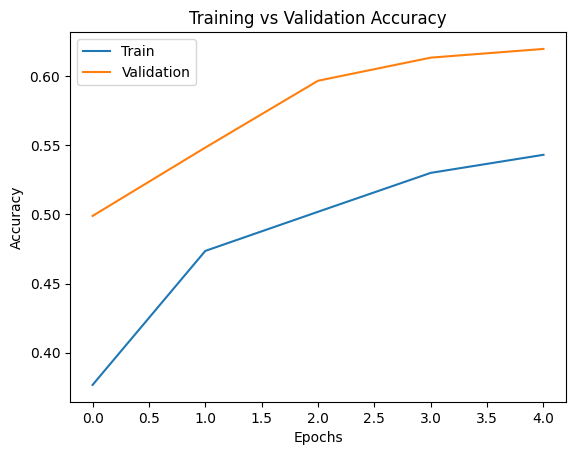

In [15]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])

plt.show()

In [16]:
classes = ['Airplane','Automobile','Bird','Cat',
           'Deer','Dog','Frog','Horse',
           'Ship','Truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


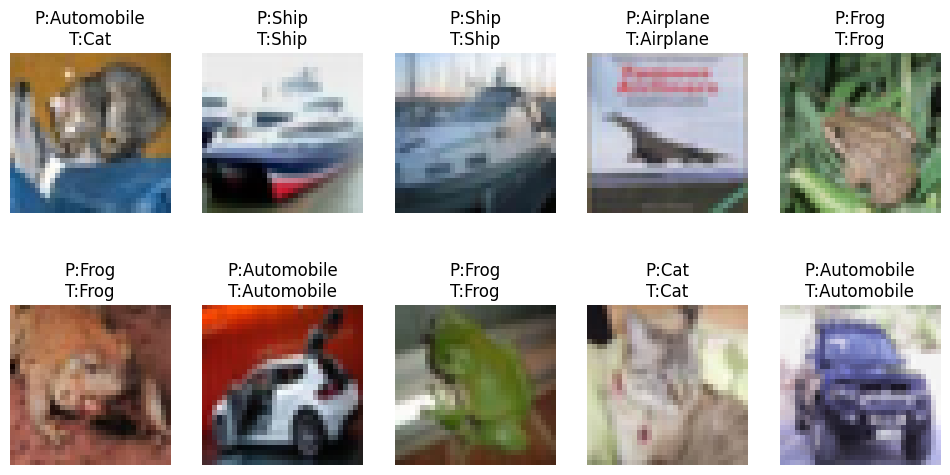

In [17]:
pred = model.predict(x_test[:10])
pred = np.argmax(pred,axis=1)
true = np.argmax(y_test[:10],axis=1)

plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title("P:"+classes[pred[i]]+"\nT:"+classes[true[i]])
    plt.axis('off')

plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


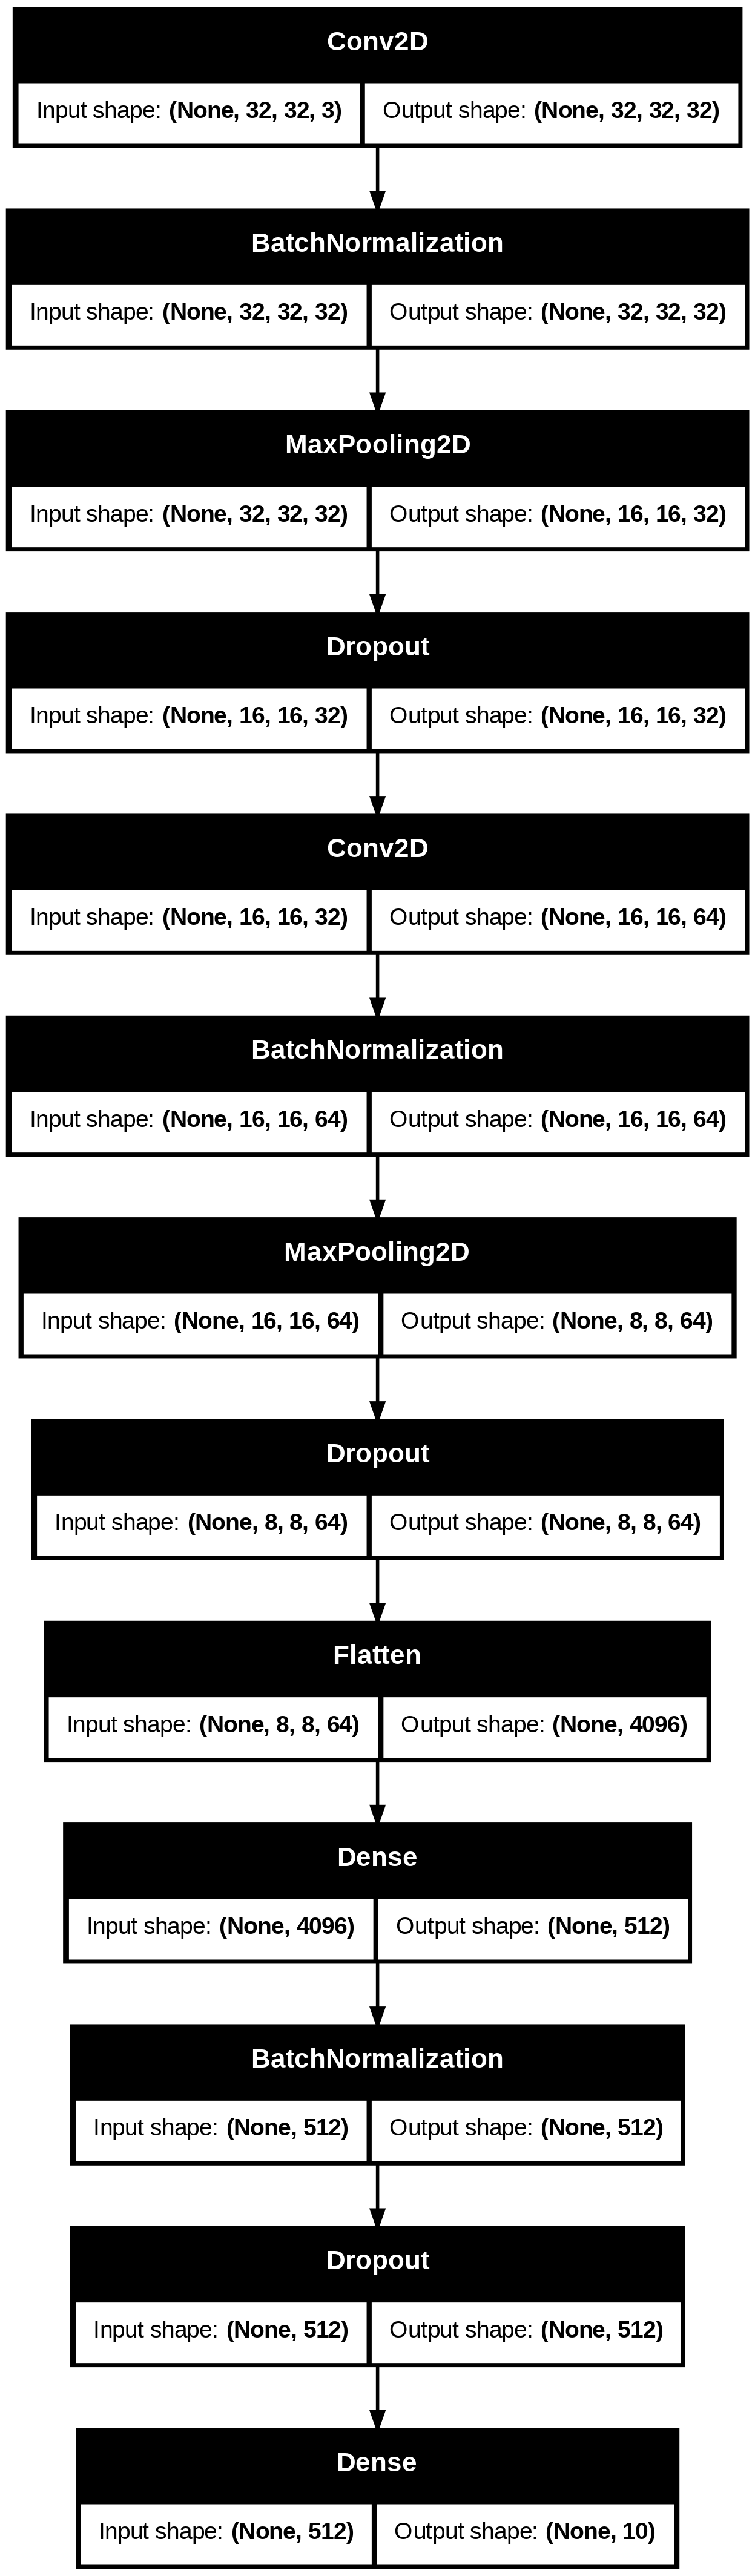

In [19]:
!pip install pydot
!apt-get install graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')
from IPython.display import Image
Image('model.png')